In [ ]:
# Re-import libraries after kernel reset
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pwlf

# Load the dataset again after reset
df = pd.read_csv('green_supply_chain.csv')

# Group by 'Product_Type' to perform regression modeling per group
grouped_results = {}

# Loop through each product type group
for product_type, group_df in df.groupby('Product_Type'):
    X = group_df[['Waste_Generated_kg', 'CO2_Emissions_kg', 'Renewable_Energy', 'Cost']]
    y = group_df['Sustainability_Score']
    
    # Check if group has enough data to split
    if len(group_df) < 5:
        continue

    # Split into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and calculate evaluation metrics
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    group_result = {
        'intercept': model.intercept_,
        'coefficients': model.coef_,
        'features': X.columns.tolist(),
        'r2': r2,
        'mae': mae,
        'rmse': rmse,
        'regression_model': f'y = {model.intercept_:.2f} + ' + ' + '.join([f'{coef:.2f} * {feature}' for coef, feature in zip(model.coef_, X.columns)])
    }
    grouped_results[product_type] = group_result

# Convert the grouped results into a DataFrame
results_list = []

for product_type, result in grouped_results.items():
    result_data = {
        'Product_Type': product_type,
        'Intercept': result['intercept'],
        'Coefficients': result['coefficients'].round(2),
        'R2': result['r2'],
        'MAE': result['mae'],
        'RMSE': result['rmse'],
        'Regression_Model': result['regression_model']
    }
    results_list.append(result_data)

# Create the DataFrame
results_df = pd.DataFrame(results_list)

# Display the DataFrame
results_df



,Product_Type,Intercept,Coefficients,R2,MAE,RMSE,Regression_Model
0,Apparel,60.001526,"[-0.4, -0.03, 0.5, -0.0]",1.0,0.002462,0.002812,y = 60.00 + -0.40 * Waste_Generated_kg + -0.03...
1,Automotive,59.999985,"[-0.4, -0.03, 0.5, -0.0]",1.0,0.002757,0.003209,y = 60.00 + -0.40 * Waste_Generated_kg + -0.03...
2,Electronics,60.000732,"[-0.4, -0.03, 0.5, -0.0]",1.0,0.002673,0.003105,y = 60.00 + -0.40 * Waste_Generated_kg + -0.03...
3,Food,59.999461,"[-0.4, -0.03, 0.5, -0.0]",1.0,0.002129,0.002518,y = 60.00 + -0.40 * Waste_Generated_kg + -0.03...
4,Pharmaceutical,59.999529,"[-0.4, -0.03, 0.5, -0.0]",1.0,0.002716,0.003112,y = 60.00 + -0.40 * Waste_Generated_kg + -0.03...


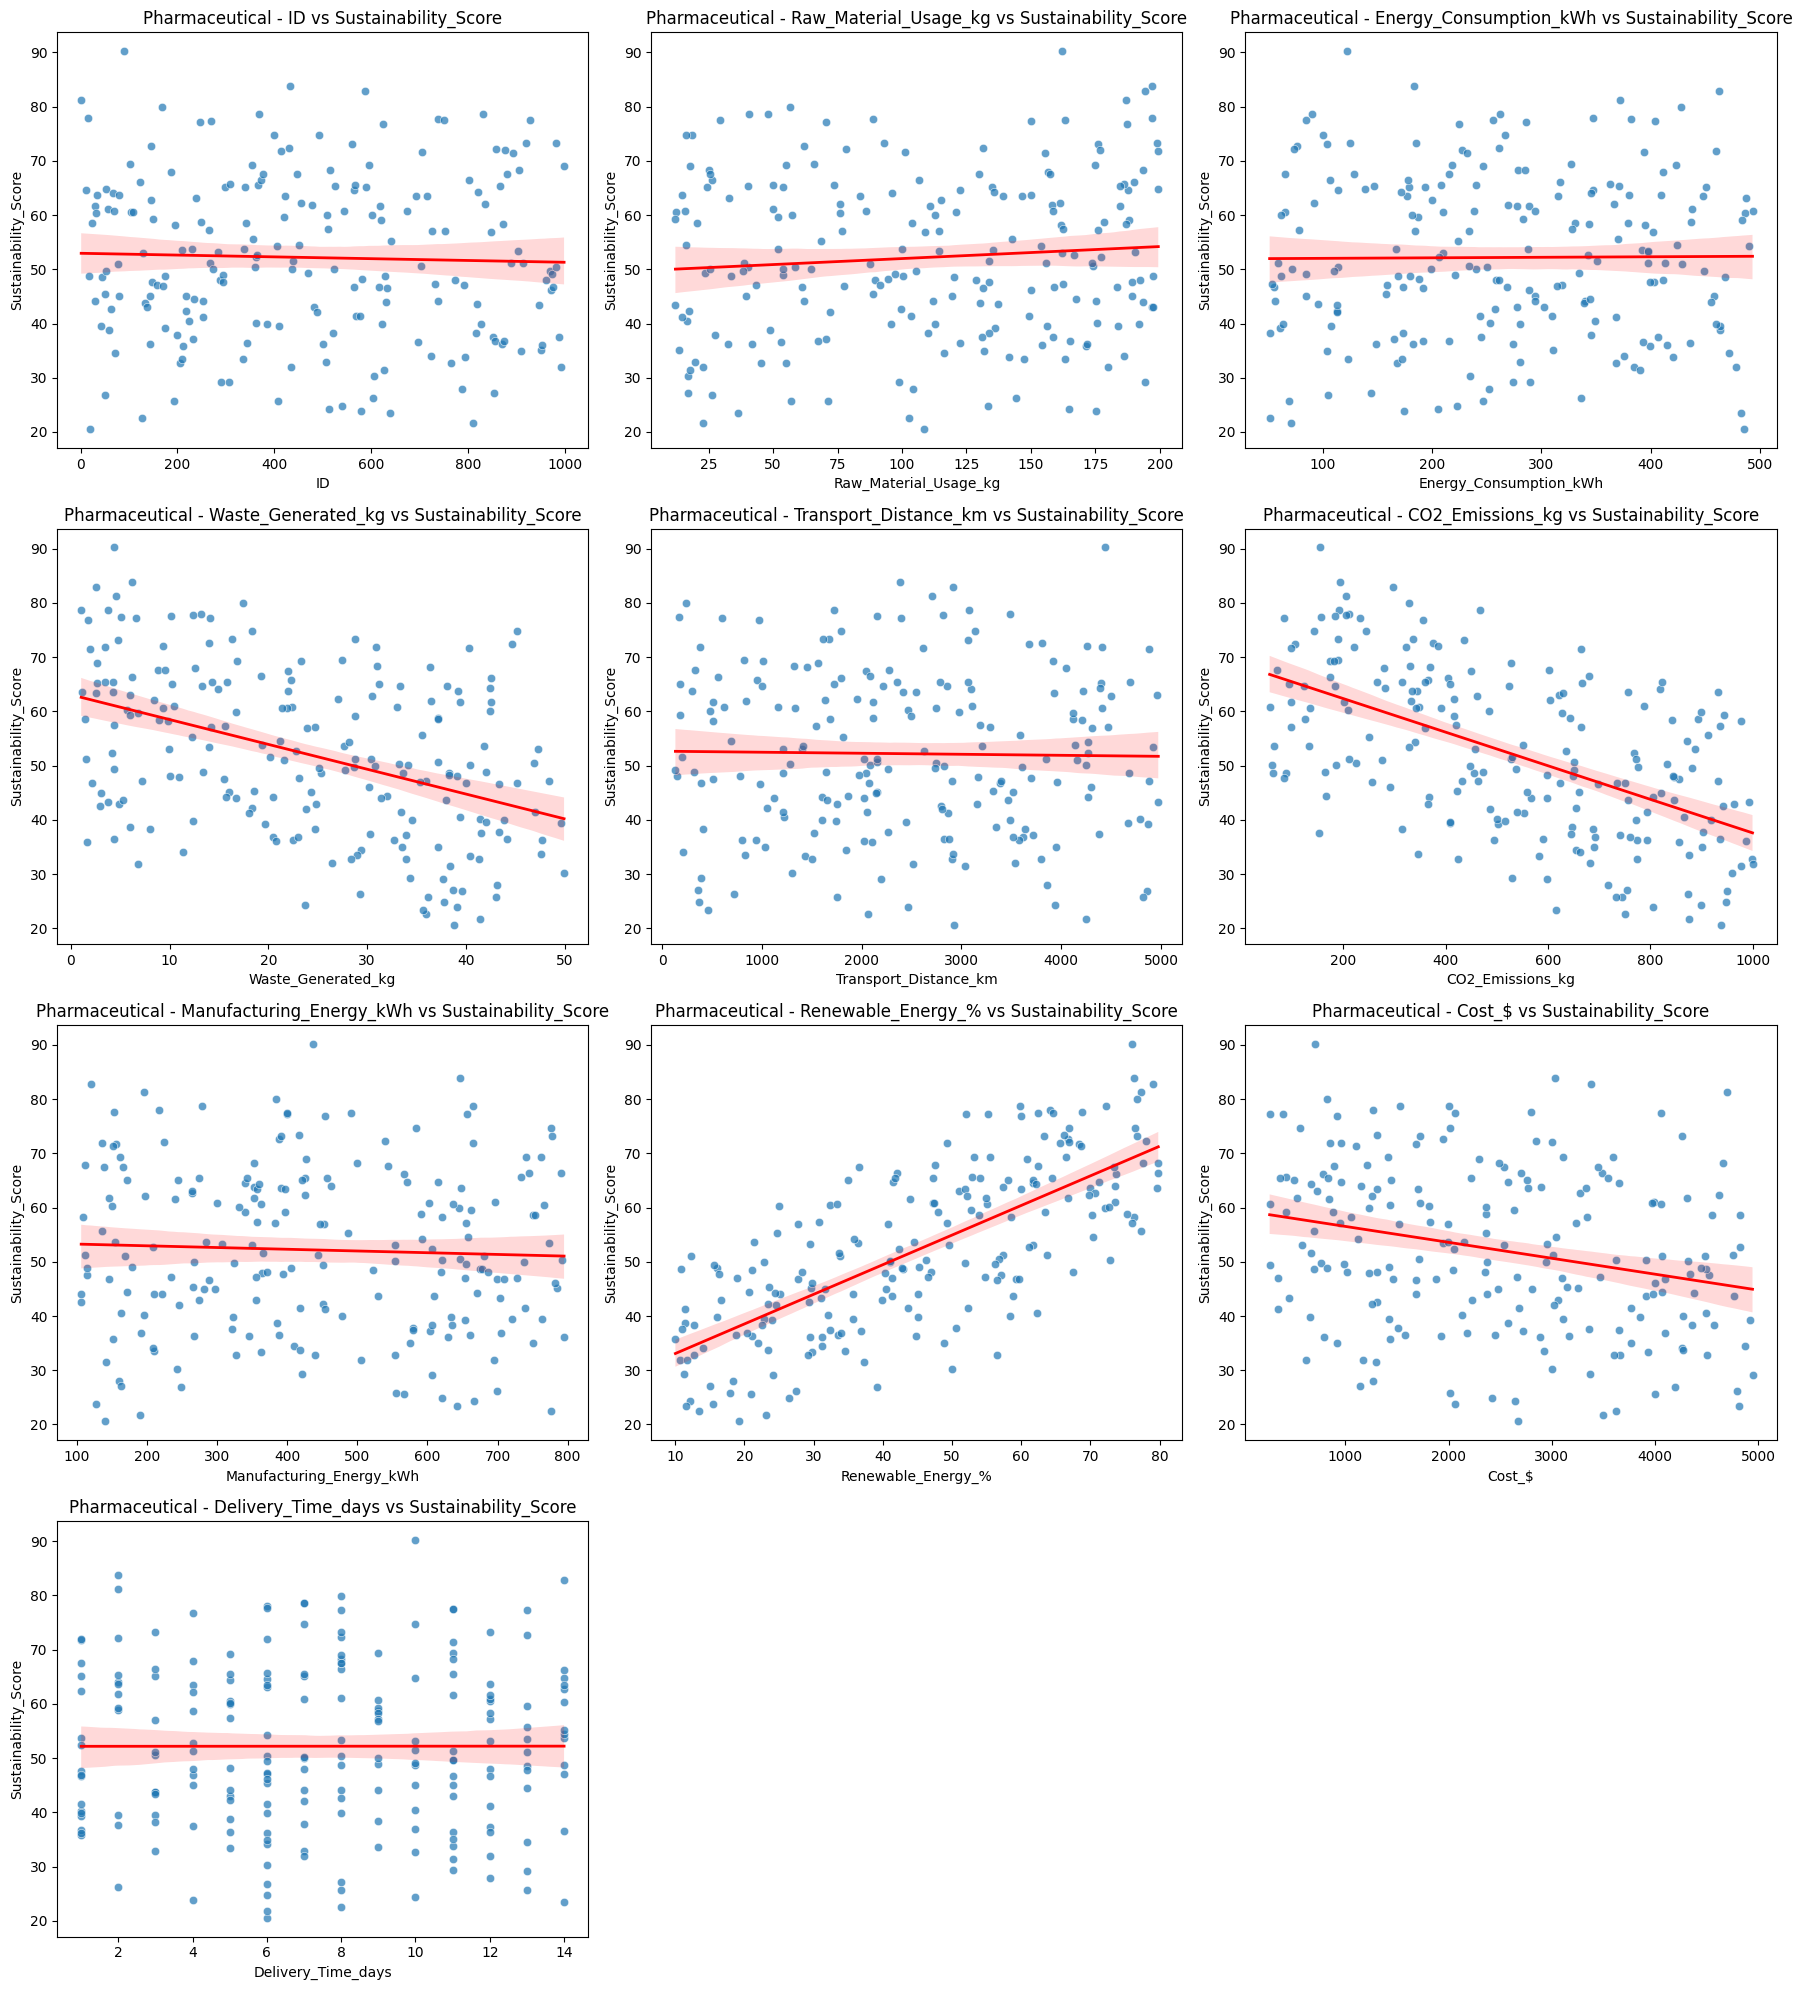

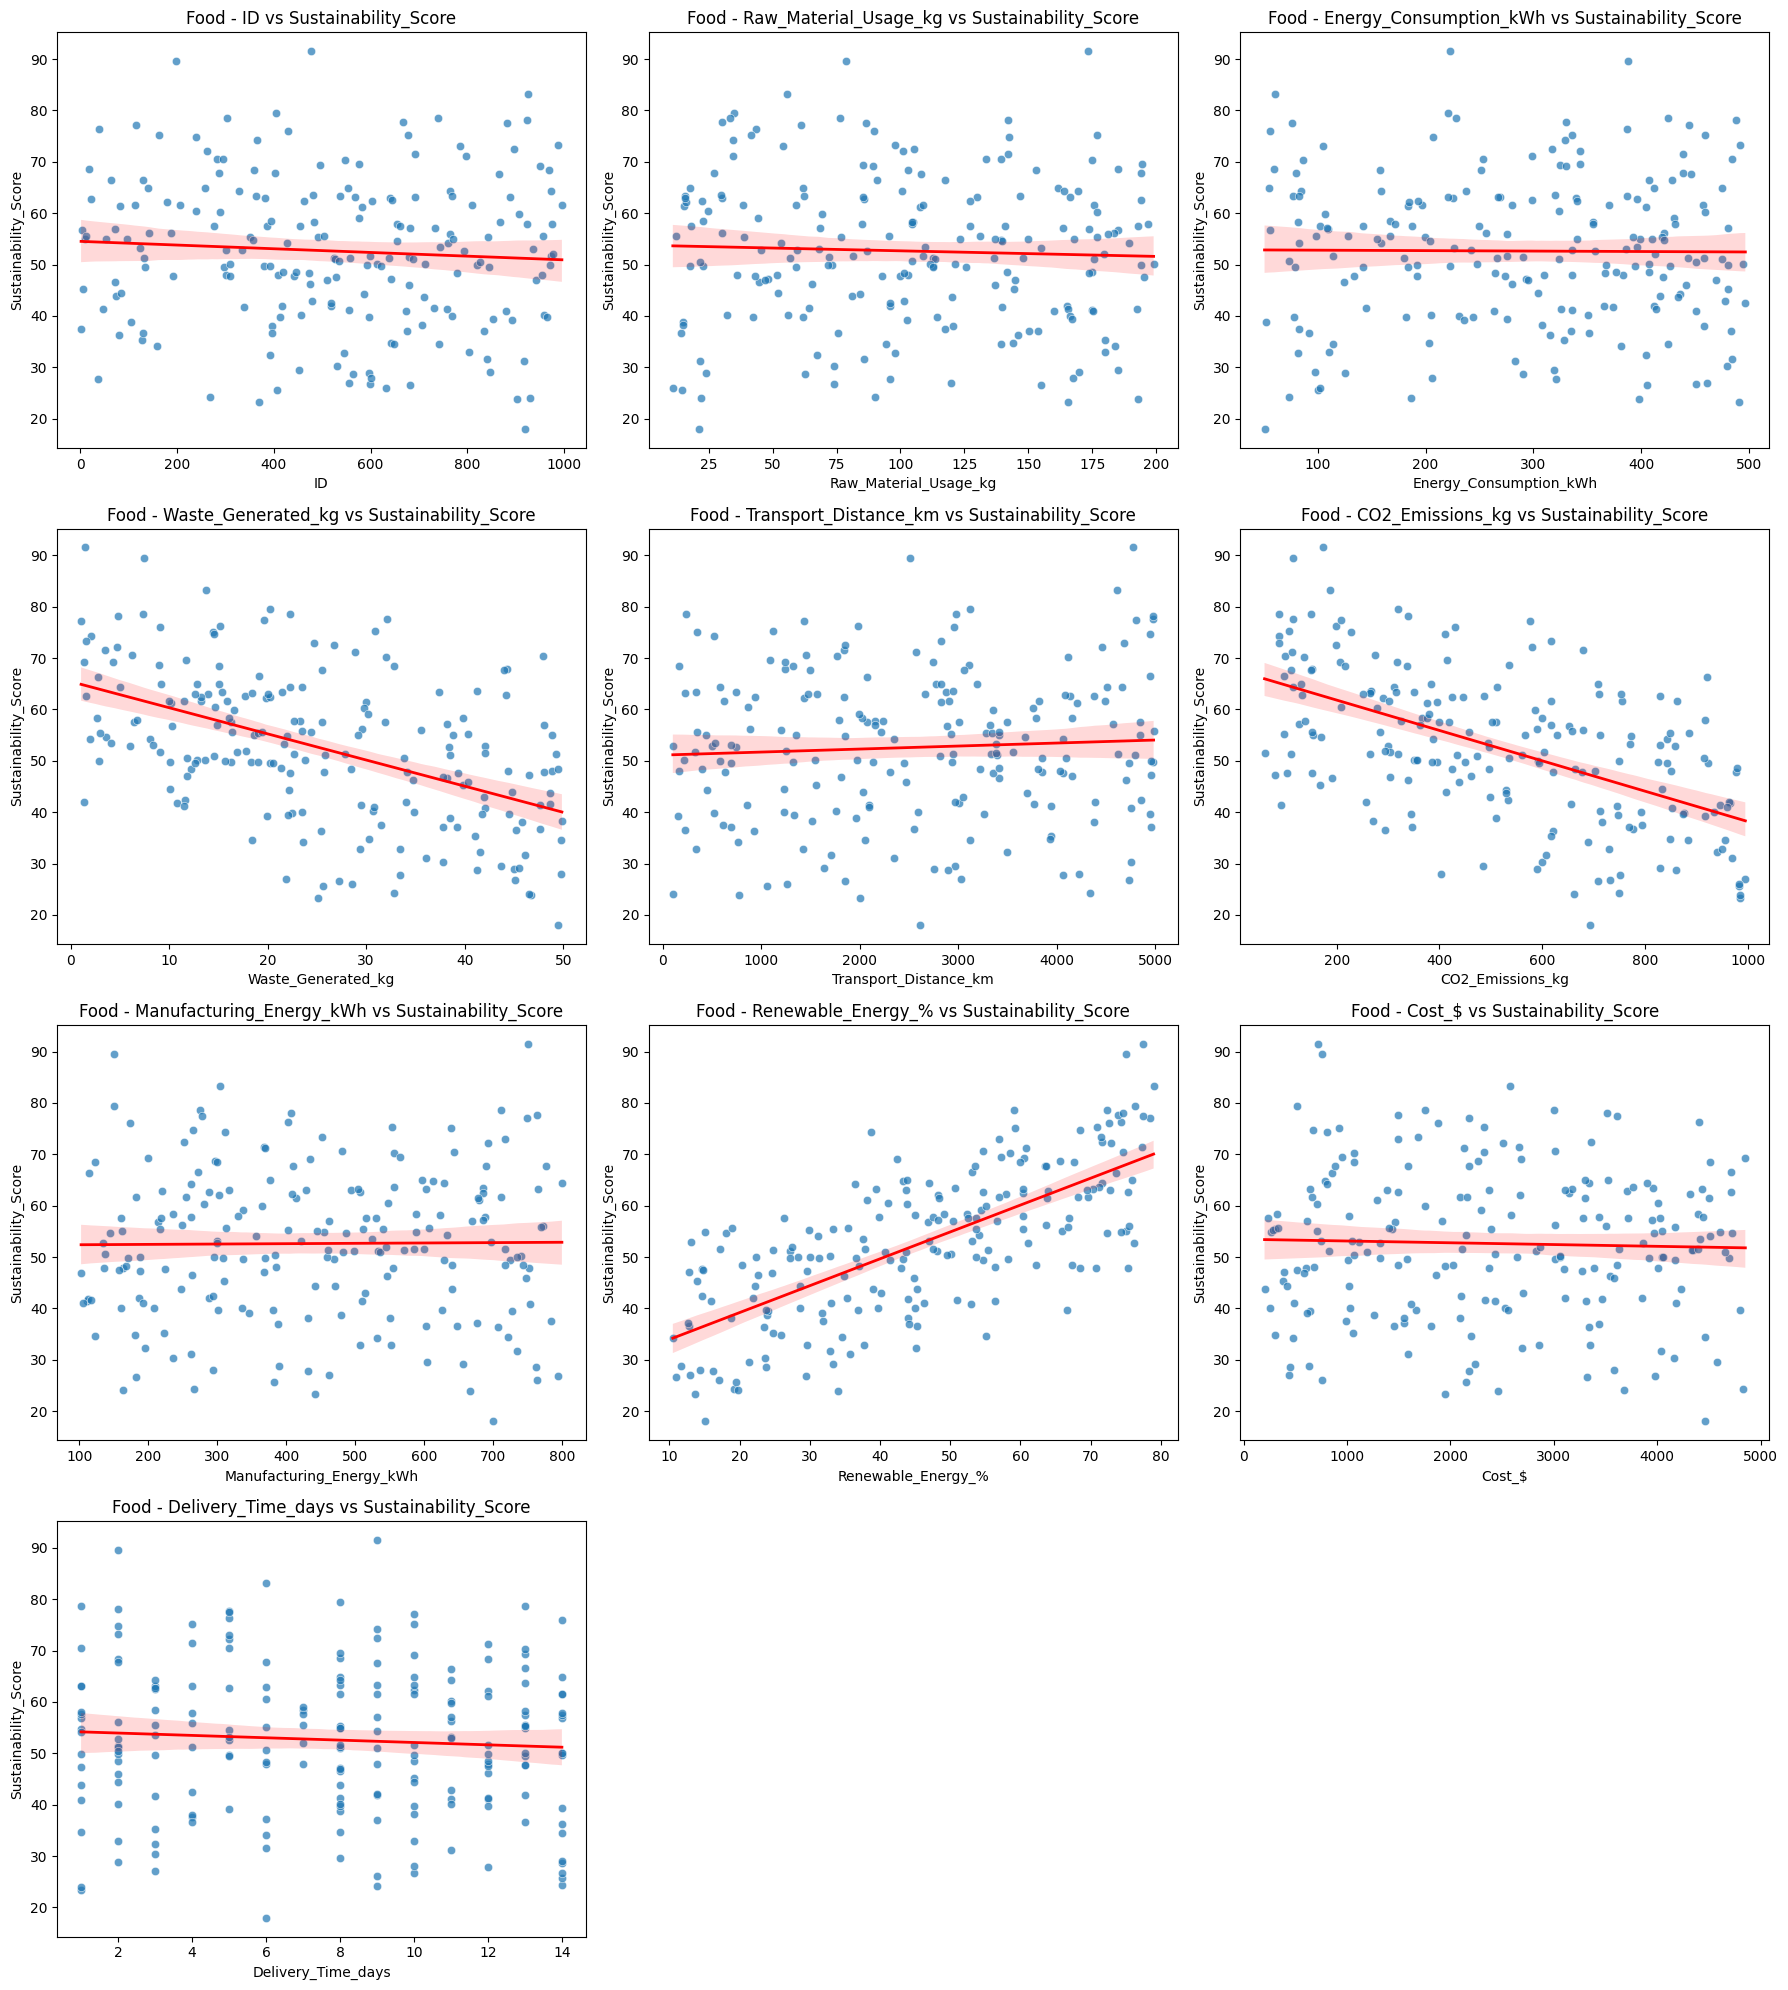

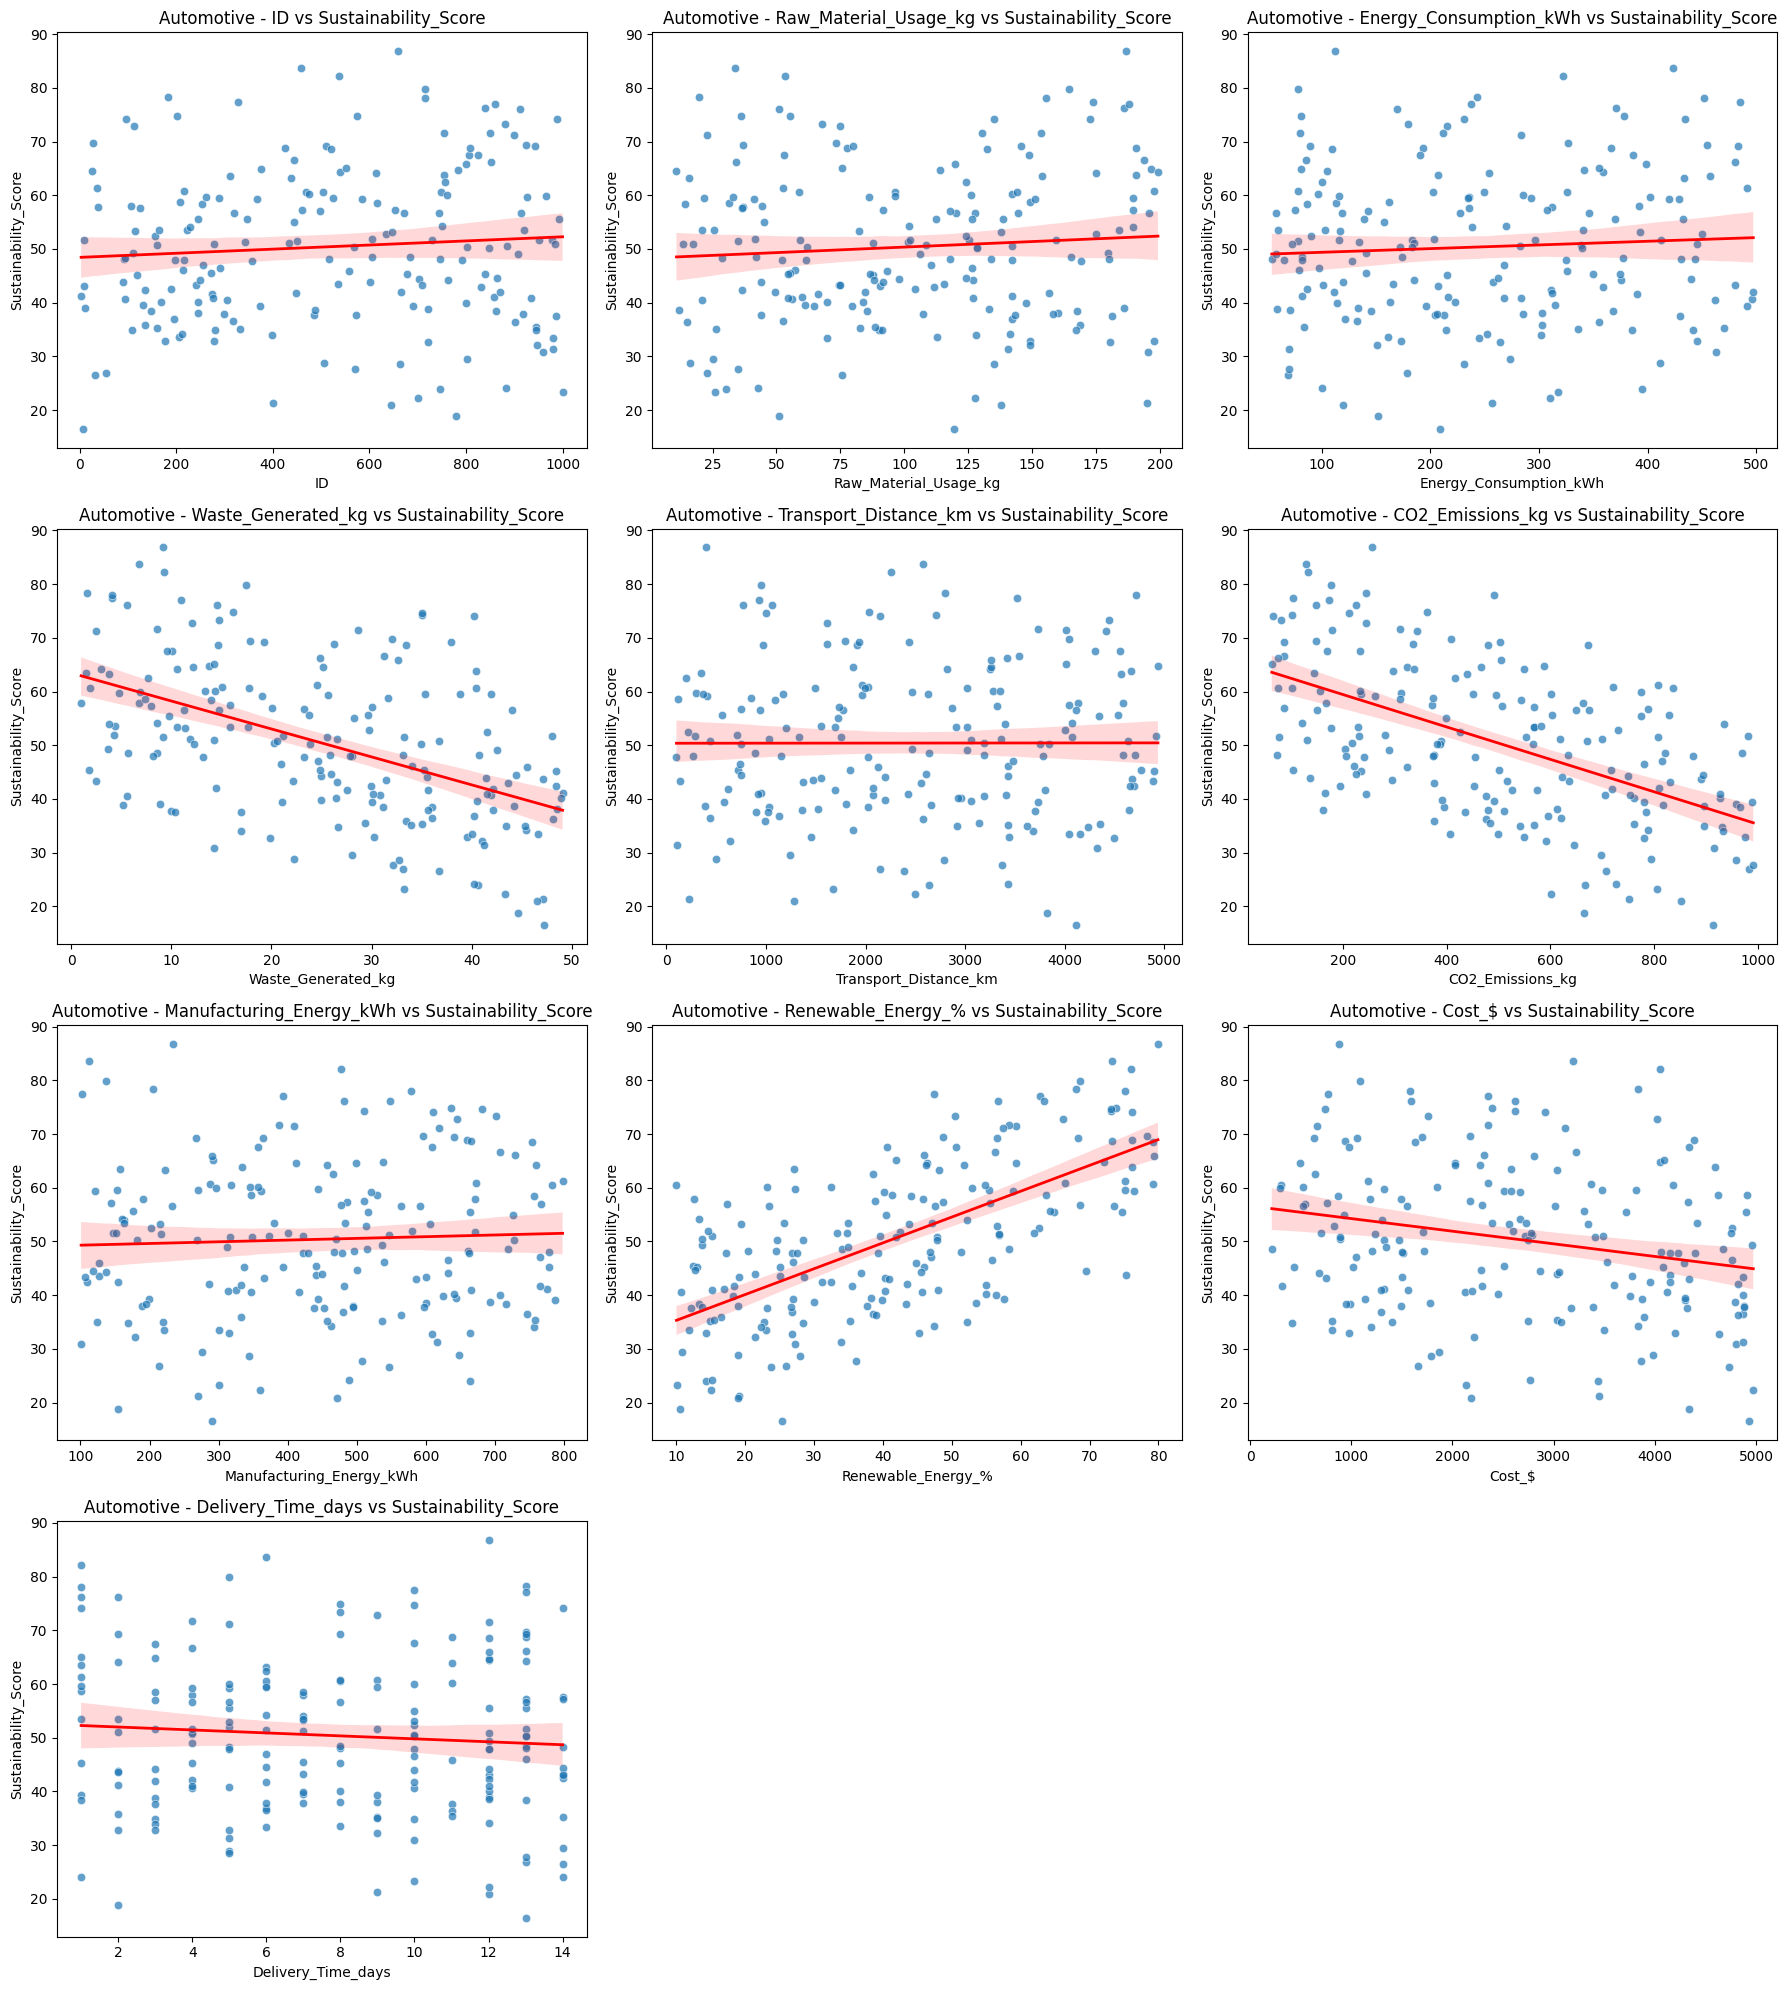

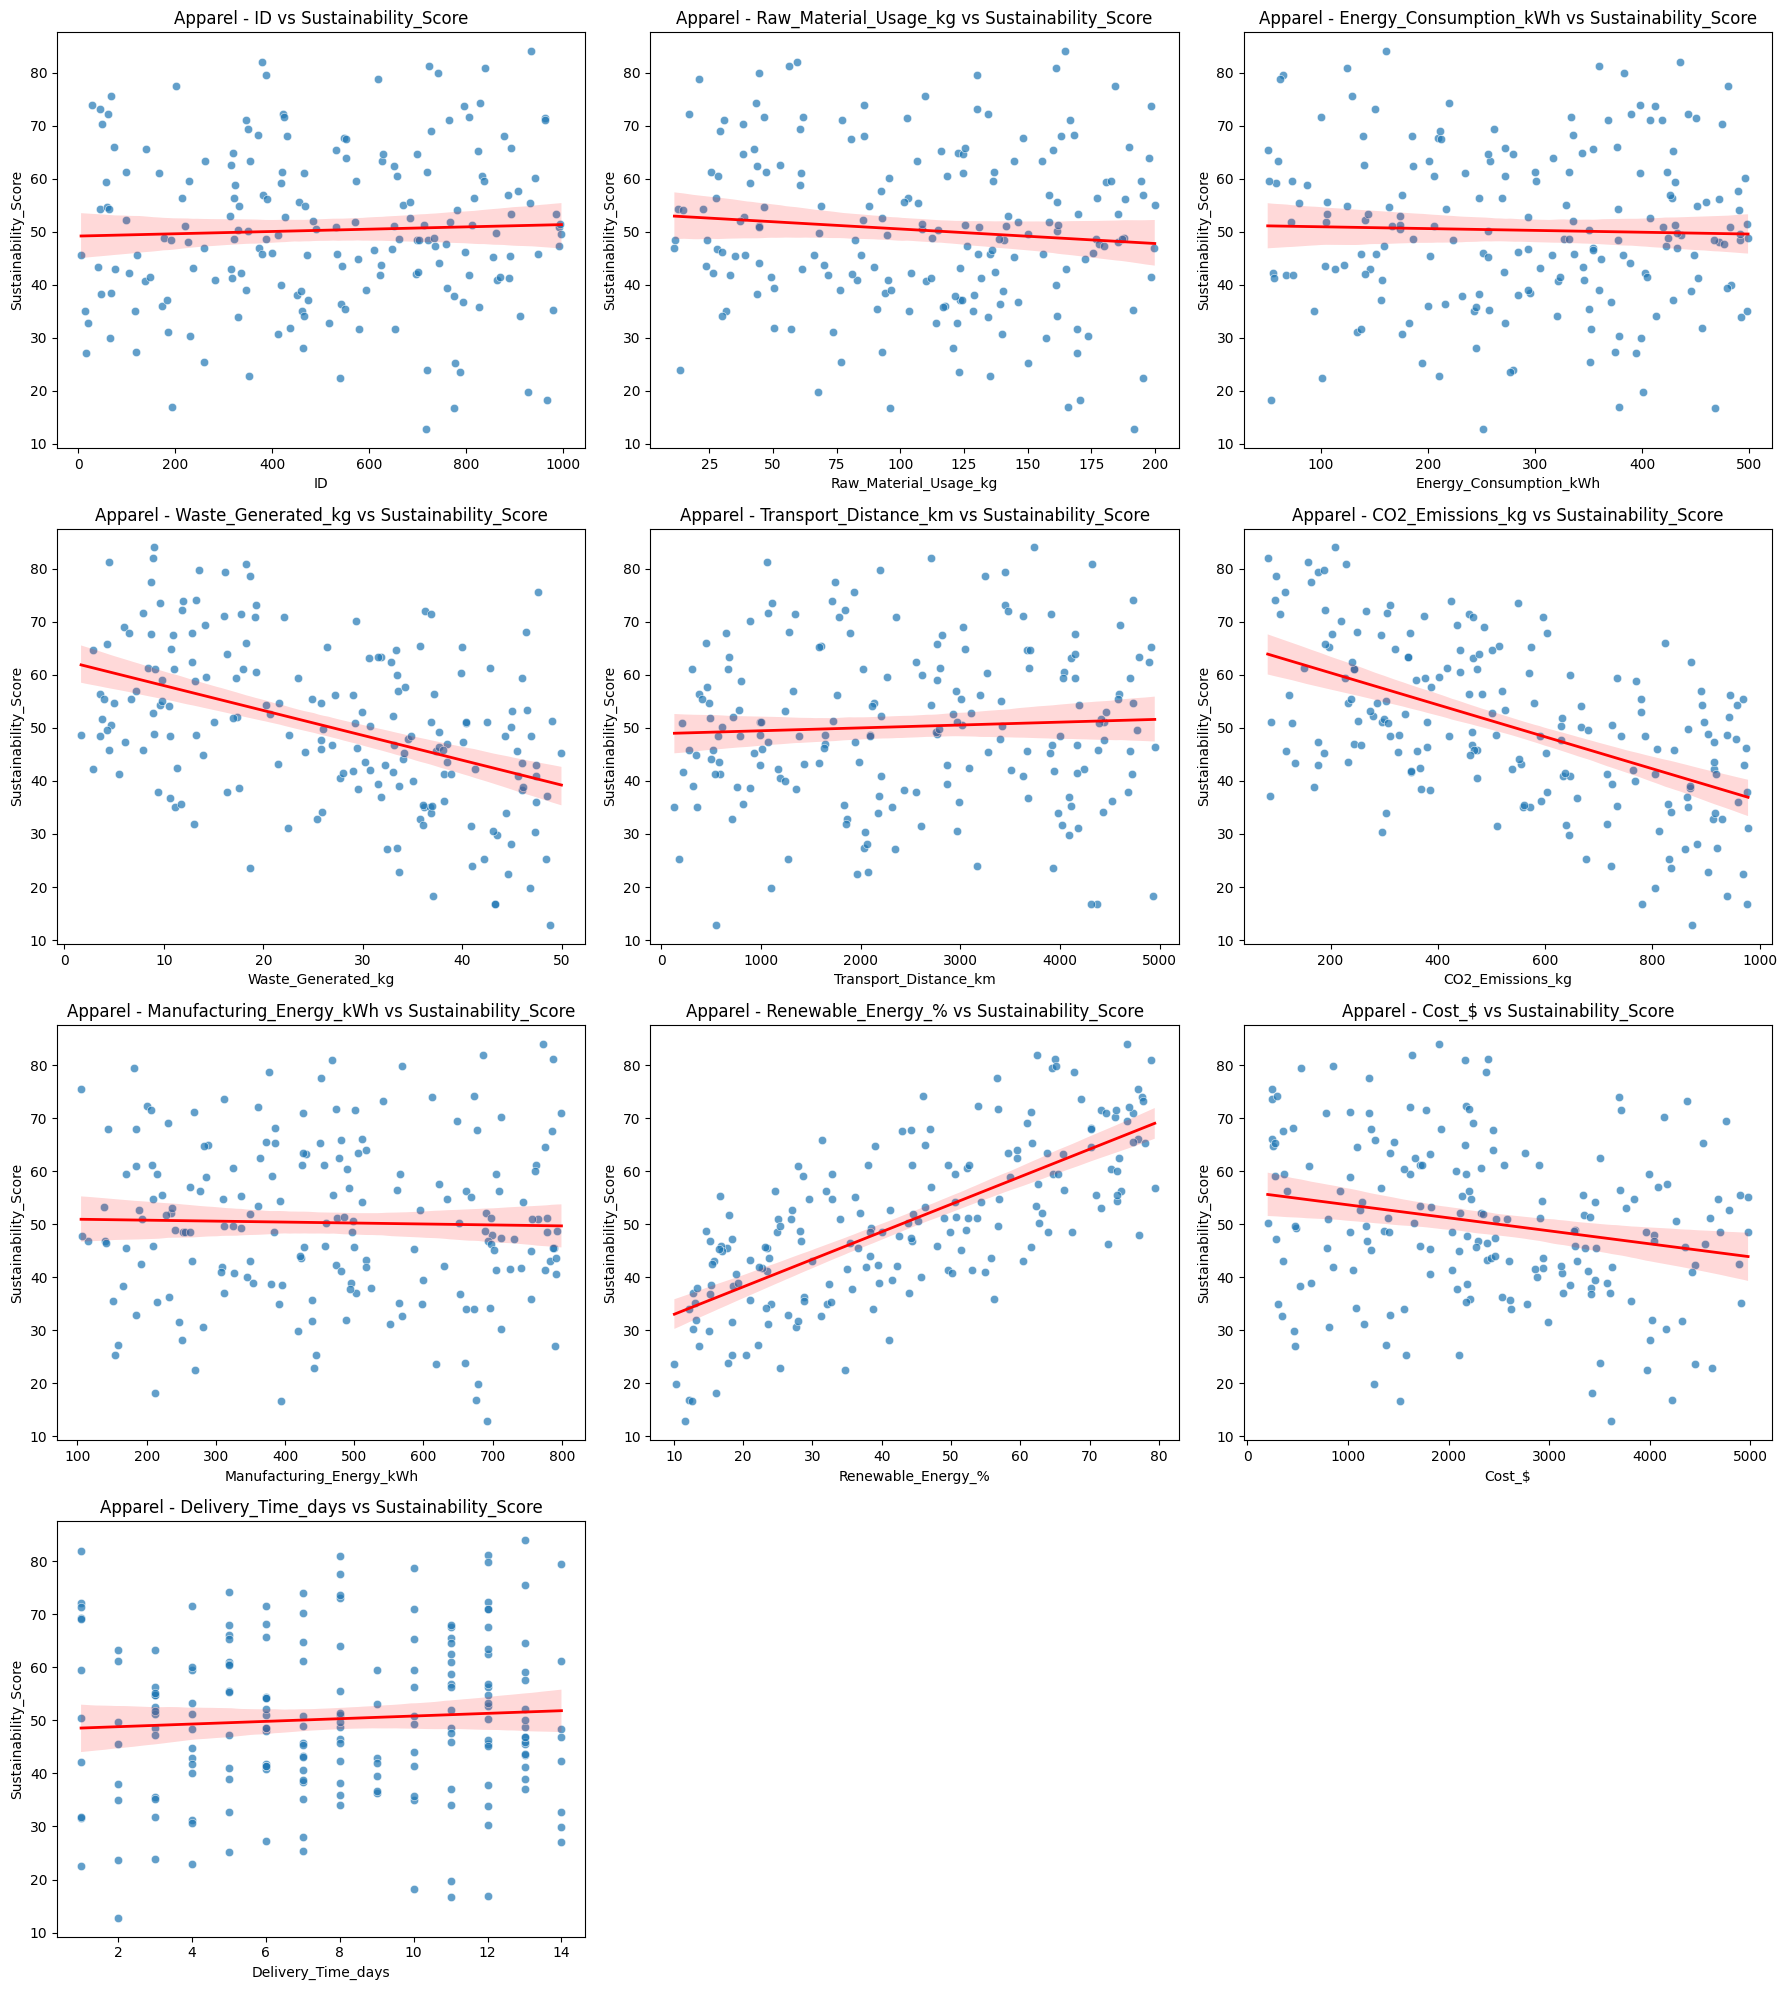

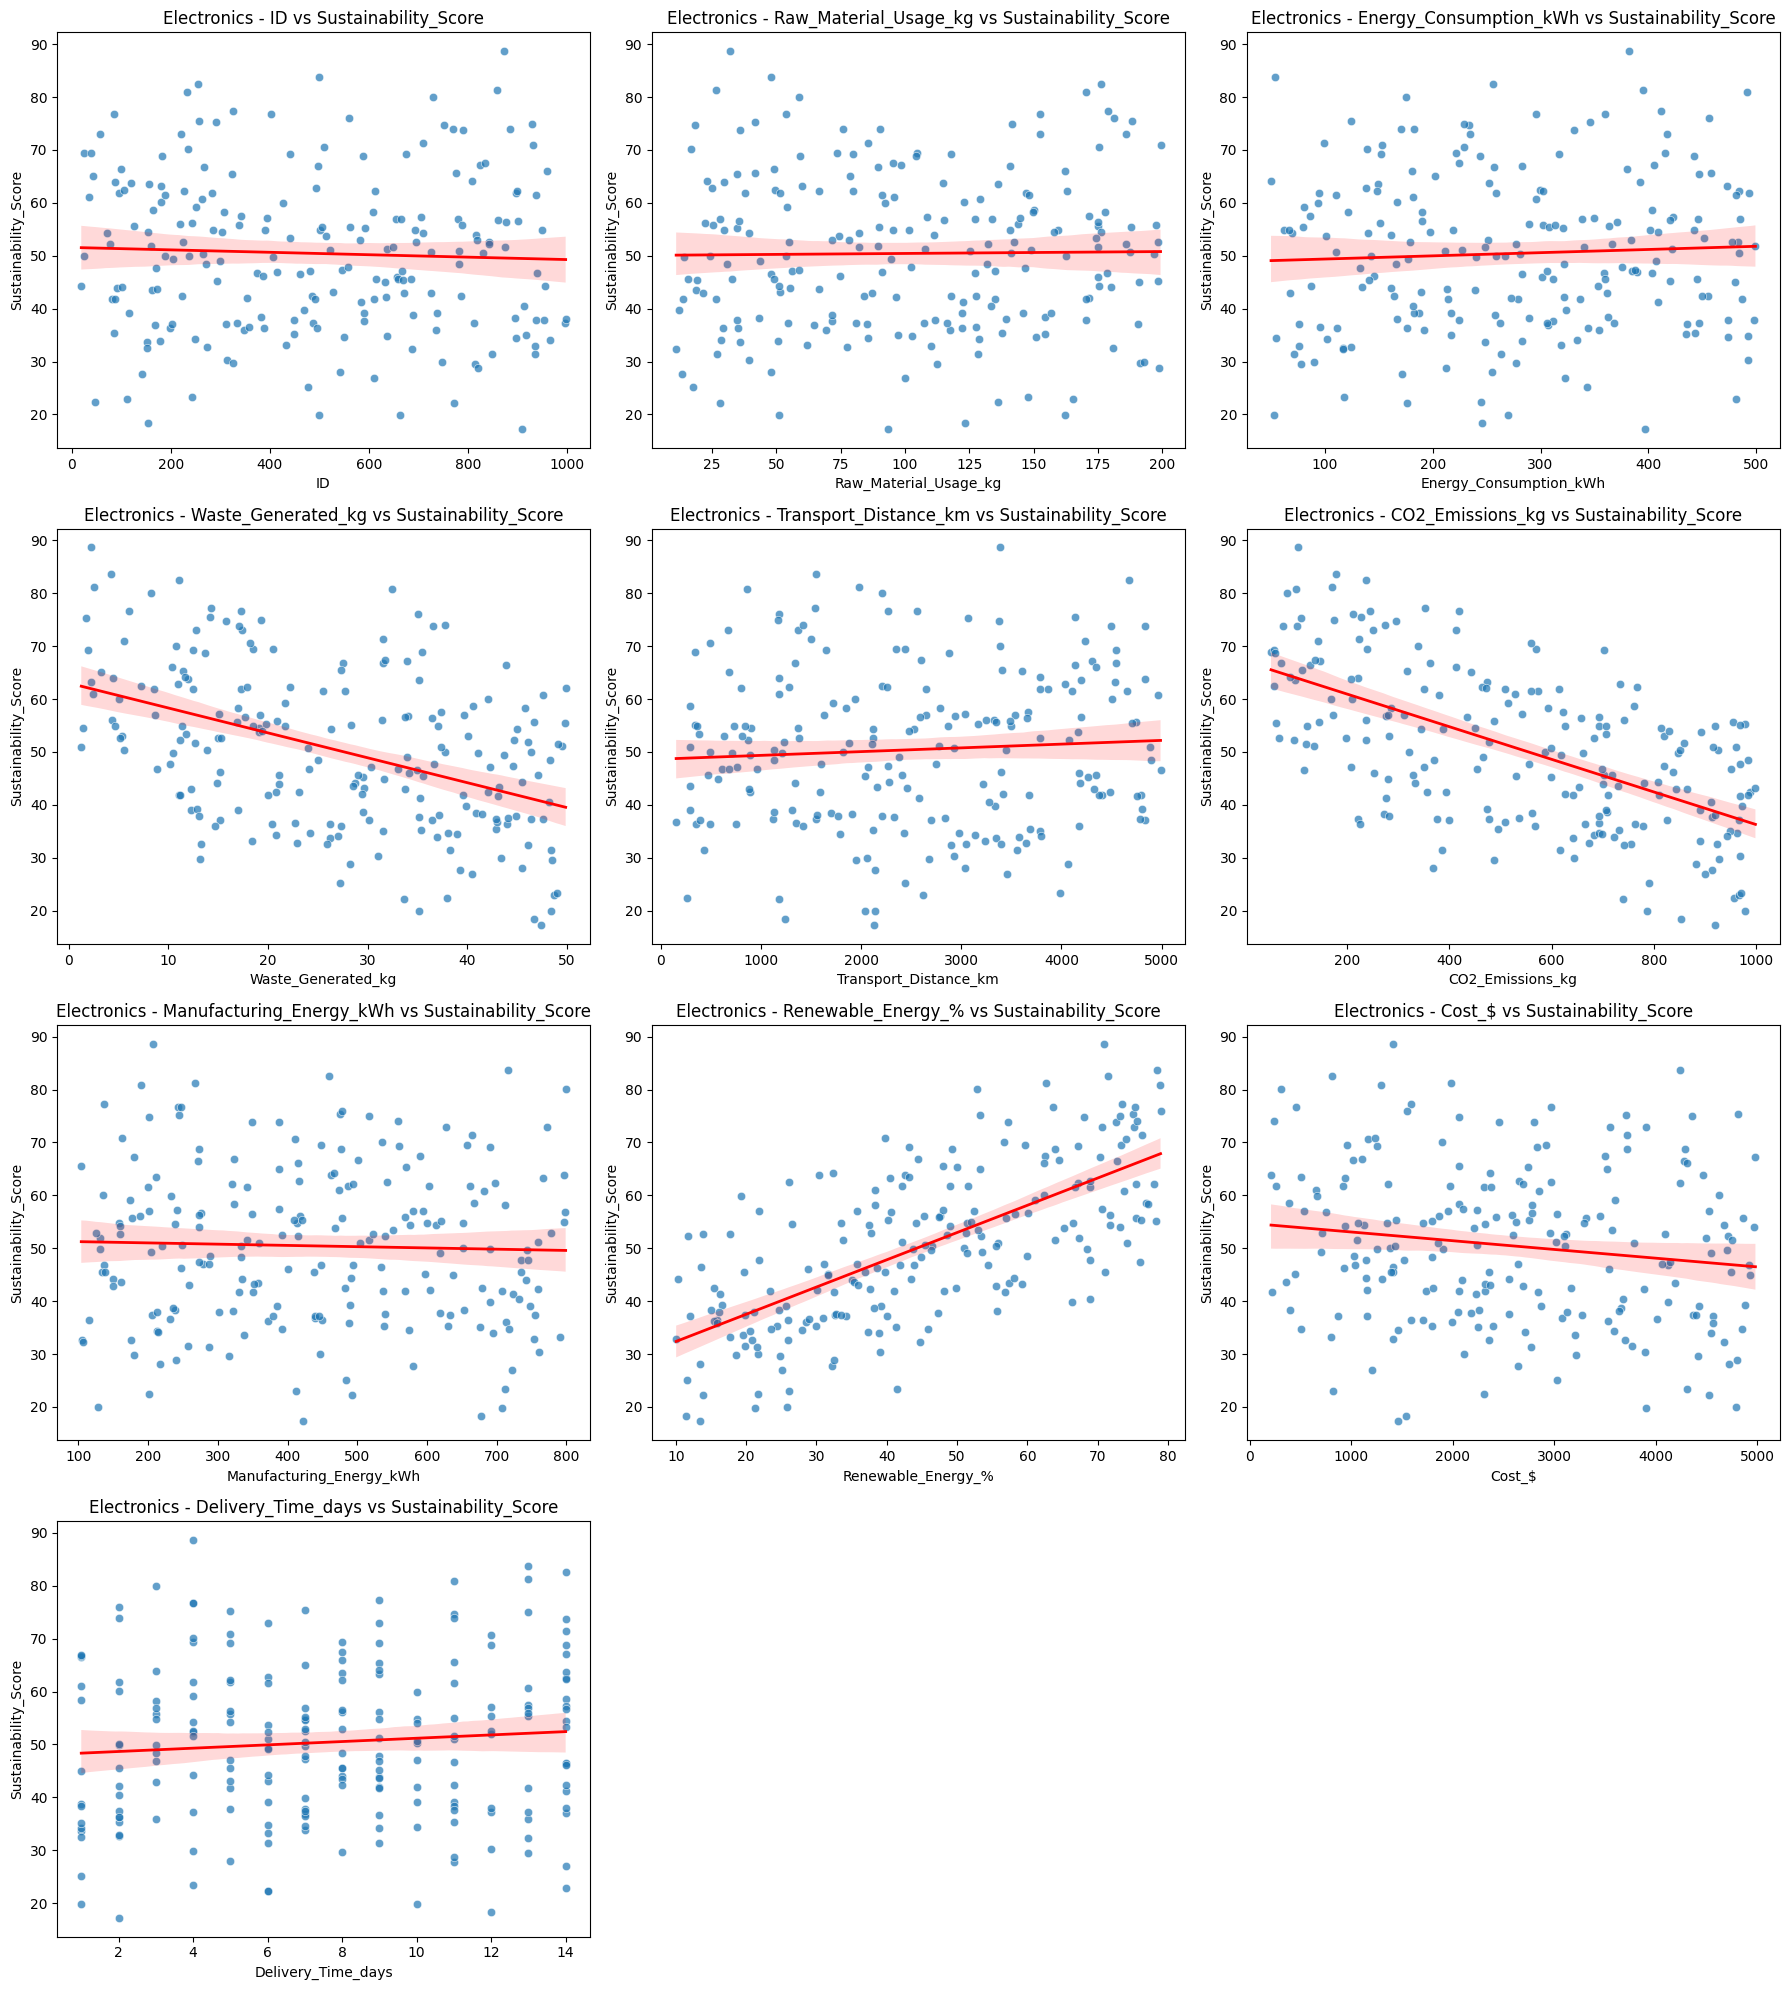

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric features excluding 'Product_Type' and 'Sustainability_Score'
numeric_features = df.drop(columns=['Product_Type', 'Sustainability_Score']).columns

# Loop through each Product_Type to create separate plots
for product_type in df['Product_Type'].unique():
    # Filter data for the specific product type
    product_data = df[df['Product_Type'] == product_type]
    
    # Create subplots for each numeric feature vs. Sustainability_Score
    n_cols = 3  # Number of columns for the plots
    n_rows = (len(numeric_features) + n_cols - 1) // n_cols  # Number of rows needed for the plots
    
    # Create subplots for this product type
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes = axes.flatten()
    
    # Plot each numeric feature vs. Sustainability_Score for the current Product_Type
    for i, feature in enumerate(numeric_features):
        ax = axes[i]
        
        # Scatter plot for the specific feature
        sns.scatterplot(data=product_data, x=feature, y='Sustainability_Score', ax=ax, alpha=0.7)
        
        # Add a regression line (trendline)
        sns.regplot(data=product_data, x=feature, y='Sustainability_Score', ax=ax, scatter=False, color='red', line_kws={"lw": 2})
        
        ax.set_title(f'{product_type} - {feature} vs Sustainability_Score')
        ax.set_xlabel(feature)
        ax.set_ylabel('Sustainability_Score')
    
    # Turn off any unused subplots
    for i in range(len(numeric_features), len(axes)):
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()
